# Lab_2

### 1. Develop yourself using numpy library: 
a) a function to implement stochastic gradient descent (SGD) algorithm  
b) Adam's optimization algorithm for a function of two variables f(x,y).
### 2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).
### 3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import random

In [2]:
x1, x2 = symbols('x1 x2', real=True)
z = x1**2 + 3*x2**2 + 5
z_x1 = z.diff(x1)
z_x2 = z.diff(x2)
print('Function: {}'.format(z))
print('df/dx1    : {}'.format(z_x1))
print('df/dx2    : {}'.format(z_x2))
f = lambdify([x1, x2], z, 'numpy')
df_dx1 = lambdify([x1, x2], z_x1, 'numpy')
df_dx2 = lambdify([x1, x2], z_x2, 'numpy')

Function: x1**2 + 3*x2**2 + 5
df/dx1    : 2*x1
df/dx2    : 6*x2


In [3]:
def gradient(x1,x2):
     return np.array([df_dx1(x1,x2), df_dx2(x1,x2)])

## SGD ANALOG

In [4]:
def SGD_analog(start, learn_rate): 
    EPS = 0.0001
    itter_num = 1
    plot_y = []
    x_prev = start
    if random.choice([True, False]):
      x_next = np.subtract(x_prev, learn_rate*gradient(x_prev[0], 0))
    else:
      x_next = np.subtract(x_prev, learn_rate*gradient(0 ,x_prev[1]))
    plot_y.append(np.sum(x_next - x_prev))
    while np.linalg.norm(np.subtract(x_next,x_prev)) > EPS:
        x_prev = x_next
        if random.choice([True, False]):  
          x_next = np.subtract(x_prev, learn_rate*gradient(0 ,x_prev[1]))
        else:
          x_next = np.subtract(x_prev, learn_rate*gradient(x_prev[0], 0))
        plot_y.append(np.sum(x_next - x_prev))
        itter_num += 1   
    return (x_next, itter_num, plot_y)

Minimum (x,y) from SGD analog: [3.888e-01 1.024e-05]
Number of gradient descent iterations: 12


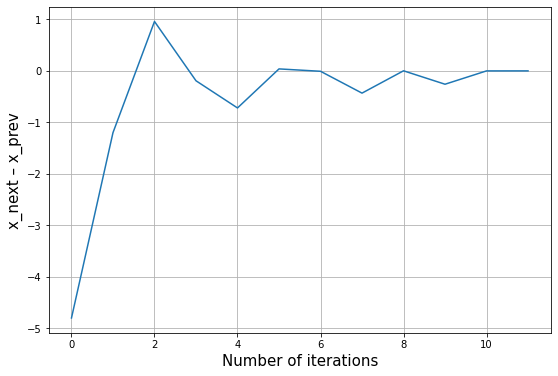

In [5]:
sgd_output = SGD_analog(np.array([3,4]), 0.2)
print('Minimum (x,y) from SGD analog: %s' %sgd_output[0])
print('Number of gradient descent iterations: %s' %sgd_output[1])
plot_x = list(range(0, sgd_output[1]))

plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(plot_x, sgd_output[2])
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'x_next – x_prev',fontsize = 15)
plt.show()

## Adam's optimization algorithm

In [6]:
def Adam():
  alpha = 0.001
  beta1 = 0.9
  beta2 = 0.999
  EPS = 0.0001 
  theta = [3, 4]
  theta_prev = [-1, -1]
  m, v, t = 0, 0, 0
  diff = []

  while not np.allclose(np.asarray(theta), np.asarray(theta_prev)):
    t = t + 1
    g = gradient(theta[0], theta[1])
    m = beta1 * m + (1 - beta1) * g
    v = beta2 * v + (1 - beta2) * g**2
    m_ = m / (1 - beta1**t)
    v_ = v / (1 - beta2**t)
    theta_prev = theta
    theta = theta - alpha*m_ / (np.sqrt(v_) + EPS)
    diff.append(np.sum(theta-theta_prev))
  return theta, t, diff

Minimum (x,y) Adam: [7.20494653e-14 1.32787917e-06]
Number of Adam iterations: 9104


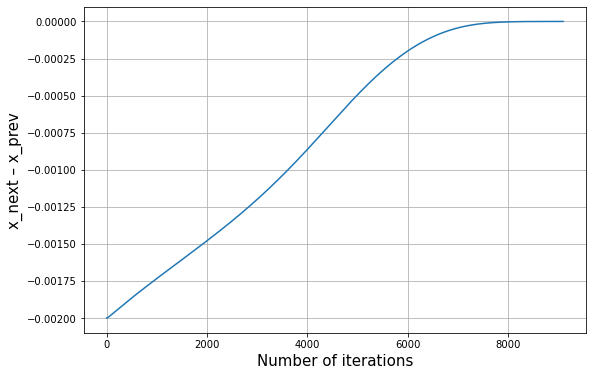

In [7]:
adam_output = Adam()
print('Minimum (x,y) Adam: %s' %adam_output[0])
print('Number of Adam iterations: %s' %adam_output[1])
plot_x = list(range(0, adam_output[1]))

plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(plot_x, adam_output[2])
plt.xlabel(u"Number of iterations",fontsize = 15)
plt.ylabel(u'x_next – x_prev',fontsize = 15)
plt.show()